In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/EDA Projects/FREECODECAMP_Data_Analysis_Projects/fcc-forum-pageviews.csv'

#Set the index to the date column.
df = pd.read_csv(file_path, parse_dates = ['date'], index_col = 'date')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [ ]:
# Clean data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset

df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

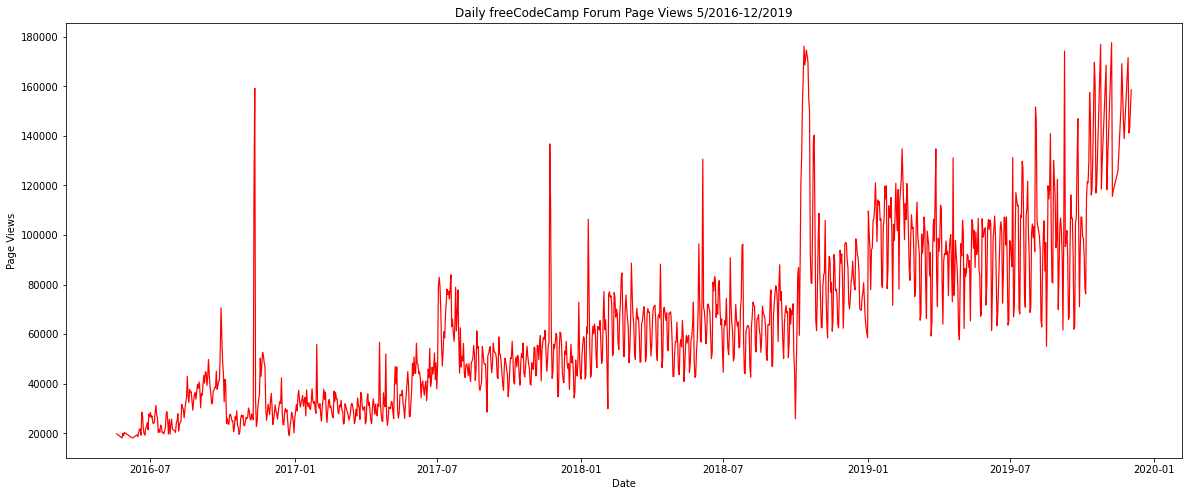

In [10]:
# Creating a DATE vs VIEWS draw_line_plot

fig, ax = plt.subplots(figsize = (20,8))
ax.plot(df.index, df['value'], 'r', linewidth = 1.2)

ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

fig.savefig('line_plot.png')


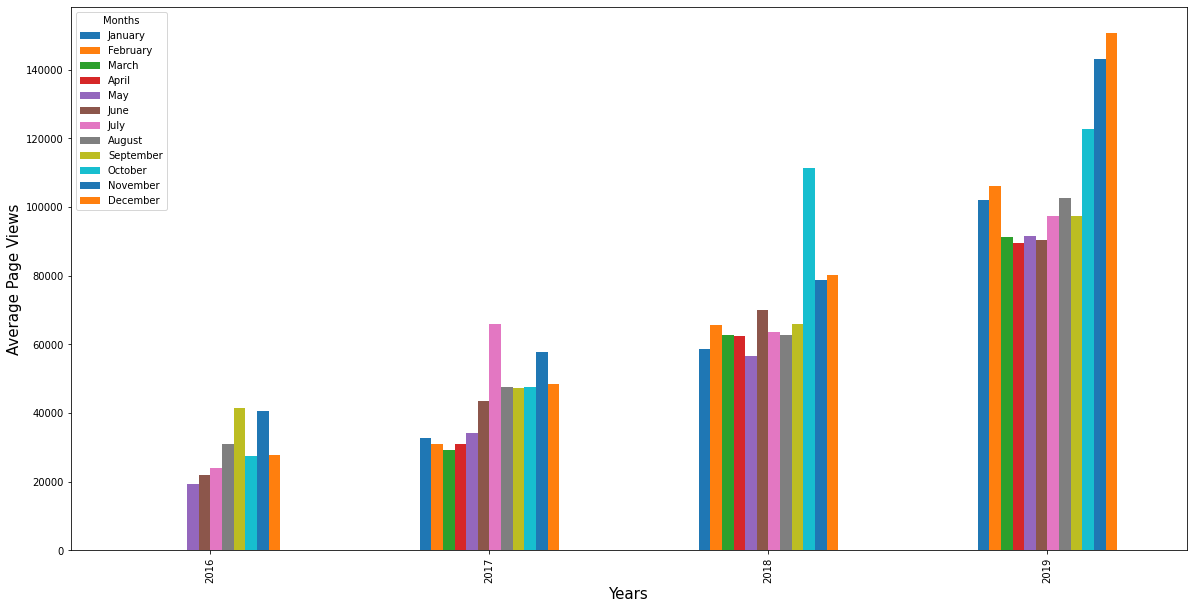

In [19]:
# Creating the index for the plot and extracting months and year data from Dates c=

df["month"] = df.index.month
df["year"] = df.index.year
df_bar = df.groupby(["year","month"])["value"].mean()
df_bar = df_bar.unstack()

df_bar.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']

# Create a Average Page Views vs Years draw_bar_plot 
fig = df_bar.plot.bar(legend = True, figsize = (20,10)).figure

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Average Page Views', fontsize = 15)
plt.legend(title= 'Months', fontsize = 10)

fig.savefig('bar_plot.png')

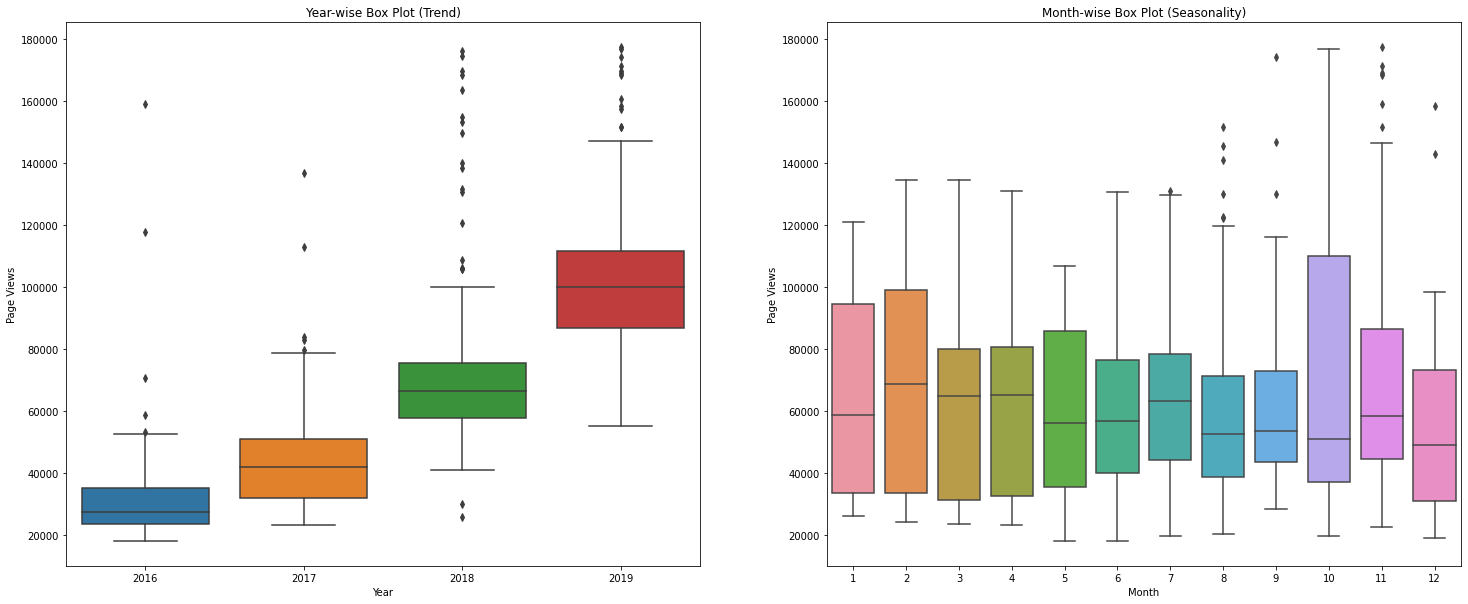

In [24]:
# Create a 2 draw_box_plot, one will show Monthly view counts and second one will show Yearly View counts using Seaborn 

df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
df_box["month"] = df_box["date"].dt.month
df_box = df_box.sort_values("month")


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
axes[0]=sns.boxplot(x=df_box["year"],y=df_box["value"],ax=axes[0])
axes[1]=sns.boxplot(x=df_box["month"],y=df_box["value"],ax=axes[1])

# For Plot 1
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

# For Plot 2
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

# Printing the figure
fig.savefig('box_plot.png')